In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score


In [4]:

df = pd.read_csv('/content/winequality-white (1).csv')


In [ ]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Initial Visual Analysis

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

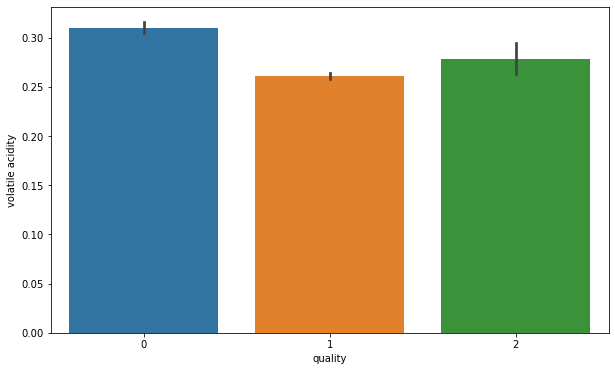

In [ ]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

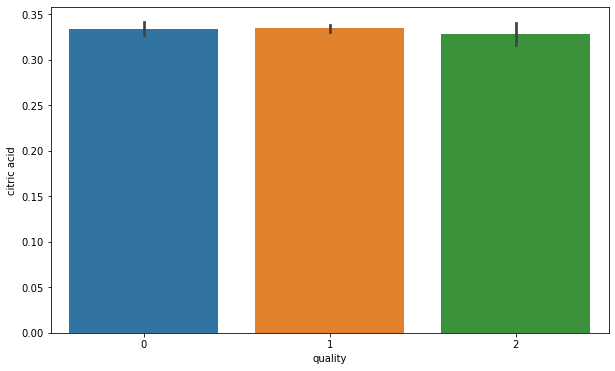

In [ ]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

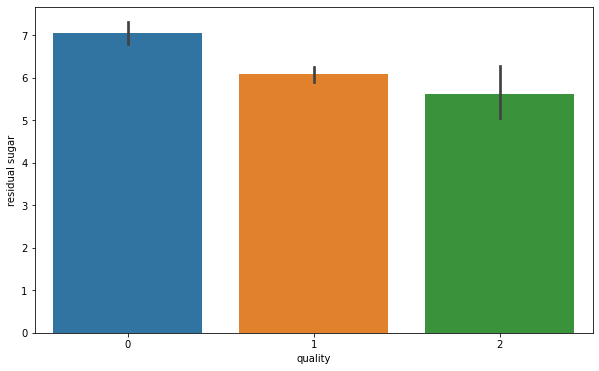

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y = 'residual sugar', data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

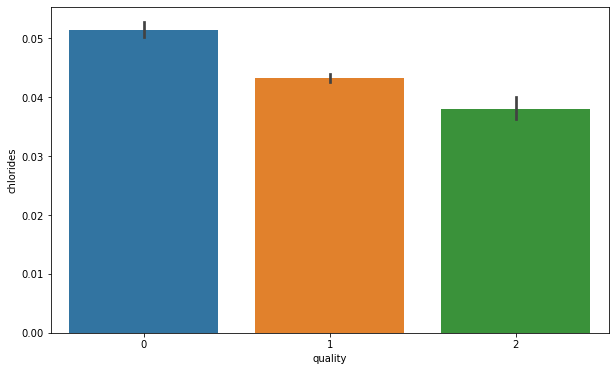

In [ ]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data=df)

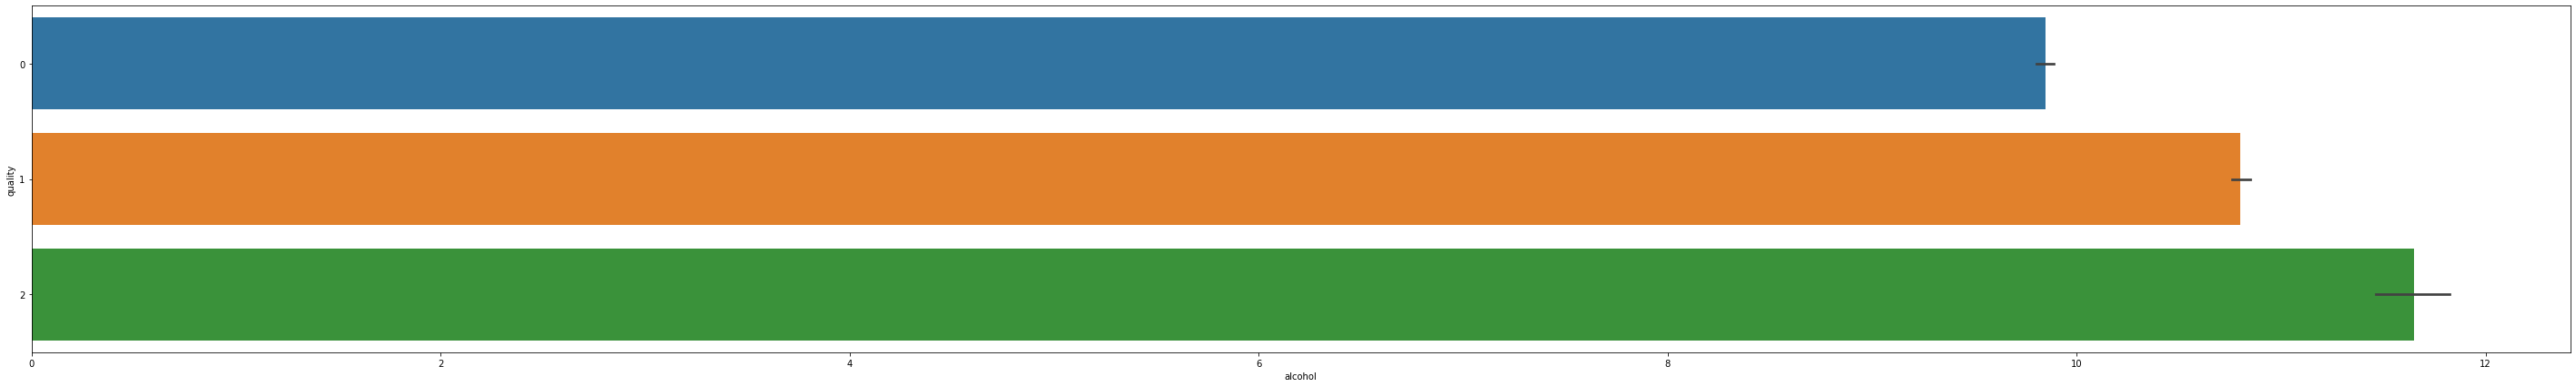

In [ ]:
plt.figure(figsize = (50,7))
ax = sns.barplot(x = "alcohol", y = "quality", data = df)


C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

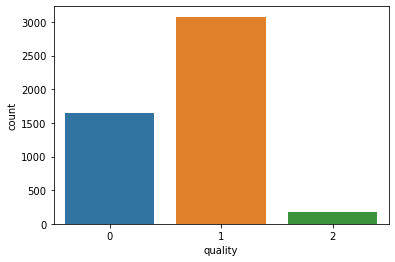

In [ ]:
sns.countplot(df['quality'])

C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


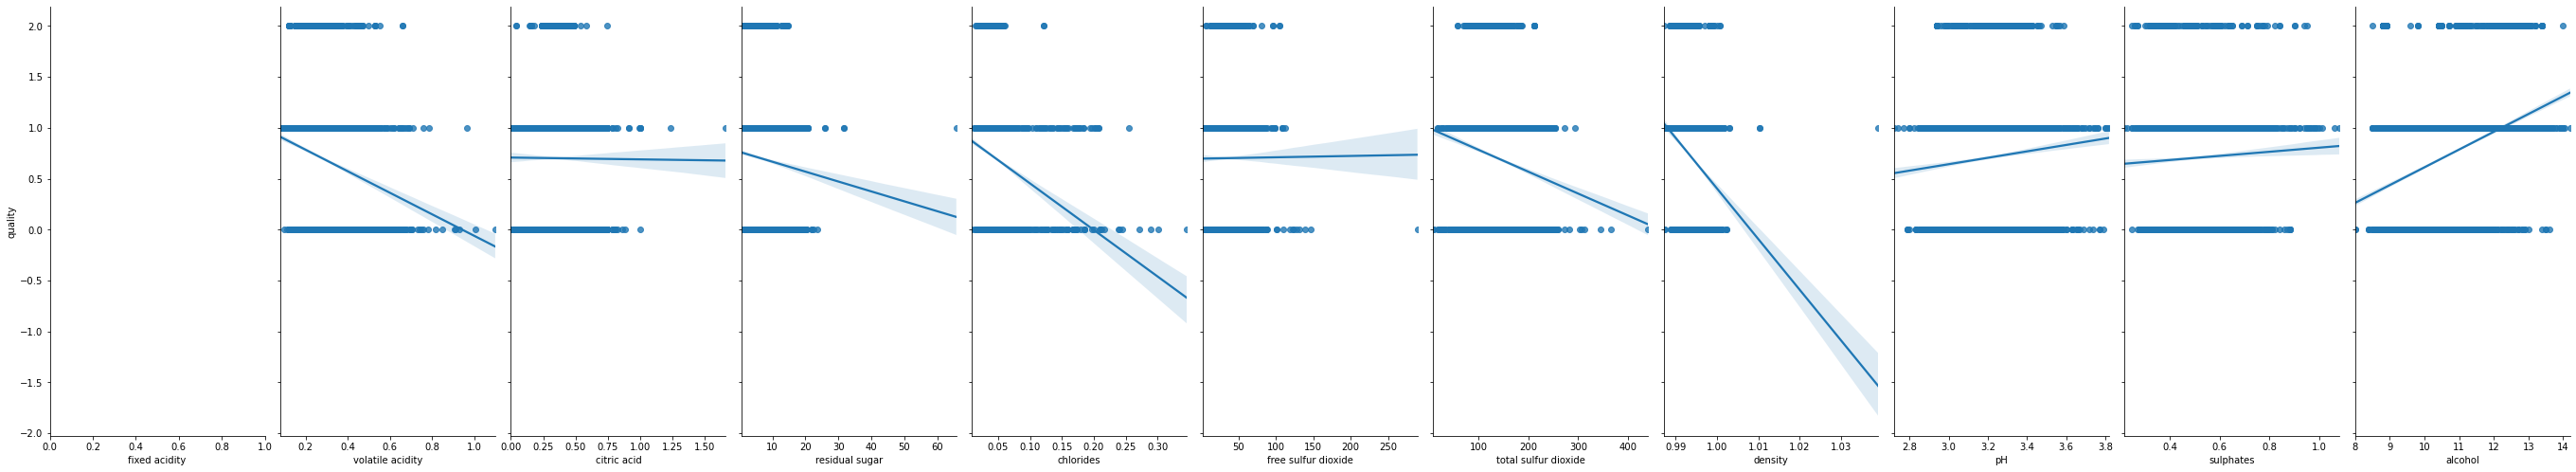

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

x = df[features]
y = df['quality']

# Plotting features vs quality
sns.pairplot(df, x_vars = features, y_vars = 'quality', kind = 'reg', size = 7, aspect = 0.5)

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

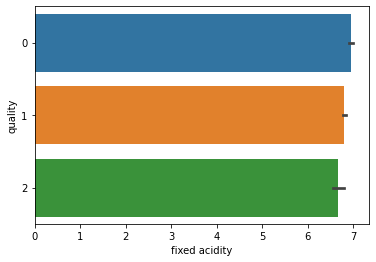

In [ ]:
sns.barplot(x='fixed acidity', y='quality', data=df)

# Gathering the training and testing Data

In [ ]:
# Since the numbers 3-9 don't really mean much, lets map these to low (0), mid(1), and high(2)
bins = [0,5.5,7.5,10] # this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0,1,2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [ ]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# This means that we initialize 80% of data for training, and 20% data for testing.

In [ ]:
for data in [y_train, y_test]:
    print(data.describe())
# We have initialized 3918 dataset for training and 980 dataset for testing

count     3918
unique       3
top          1
freq      2454
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality, dtype: int64


# K Nearest Neighbors Classifier

In [ ]:
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(x_train,y_train)
pred_n3  =n3.predict(x_test)
print(classification_report(y_test,pred_n3))
cross_val = cross_val_score(estimator=n3, X=x_train,y=y_train,cv=10)
print(cross_val.mean())


              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

0.7292016806722689


In [ ]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(x_train,y_train)
pred_n5 = n5.predict(x_test)
print(classification_report(y_test,pred_n5))
cross_val = cross_val_score(estimator=n5, X=x_train, y=y_train, cv=10)
print(cross_val.mean())


              precision    recall  f1-score   support

           0       0.64      0.59      0.62       321
           1       0.76      0.82      0.79       624
           2       0.33      0.11      0.17        35

    accuracy                           0.72       980
   macro avg       0.58      0.51      0.52       980
weighted avg       0.71      0.72      0.71       980

0.7225618508272874


# Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
print(classification_report(y_test,pred_rfc))
cross_val = cross_val_score(estimator=rfc, X=x_train, y=y_train, cv=10)
print(cross_val.mean)


              precision    recall  f1-score   support

           0       0.80      0.73      0.76       321
           1       0.84      0.91      0.87       624
           2       1.00      0.43      0.60        35

    accuracy                           0.83       980
   macro avg       0.88      0.69      0.75       980
weighted avg       0.83      0.83      0.83       980

<built-in method mean of numpy.ndarray object at 0x000001CC5AC061C0>


# Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test,pred_dt))
cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train,cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       321
           1       0.81      0.81      0.81       624
           2       0.46      0.49      0.47        35

    accuracy                           0.75       980
   macro avg       0.65      0.66      0.65       980
weighted avg       0.75      0.75      0.75       980

0.7317520486455452


# Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))
cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(cross_val.mean())


C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.65      0.54      0.59       321
           1       0.74      0.85      0.79       624
           2       0.00      0.00      0.00        35

    accuracy                           0.72       980
   macro avg       0.47      0.46      0.46       980
weighted avg       0.69      0.72      0.70       980

0.7029144266402212


In [ ]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))
cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.72      0.30      0.43       321
           1       0.69      0.94      0.80       624
           2       0.00      0.00      0.00        35

    accuracy                           0.70       980
   macro avg       0.47      0.41      0.41       980
weighted avg       0.68      0.70      0.65       980

0.7059671694764862


# Steps To Improve Results

In [ ]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rfc_optimized = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42)

# print(rf_optimized.best_params_)

rfc_optimized.fit(x_train, y_train)
pred_optimized = rfc_optimized.predict(x_test)
print(classification_report(y_test, pred_optimized))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   5.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   5.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.6s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   2.4s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   2.4s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_sa

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 14.9min finished


              precision    recall  f1-score   support

           0       0.79      0.71      0.75       321
           1       0.83      0.90      0.86       624
           2       1.00      0.37      0.54        35

    accuracy                           0.82       980
   macro avg       0.87      0.66      0.72       980
weighted avg       0.82      0.82      0.82       980



In [ ]:
print(classification_report(y_test, pred_optimized))
print(rfc_optimized.best_params_)

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       321
           1       0.83      0.90      0.86       624
           2       1.00      0.37      0.54        35

    accuracy                           0.82       980
   macro avg       0.87      0.66      0.72       980
weighted avg       0.82      0.82      0.82       980

{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 54, 'bootstrap': True}


In [ ]:
rfeval = cross_val_score(estimator=rfc, X=x_train, y=y_train, cv=10)
rfeval.mean()

0.8055058980113785

In [ ]:
rf_optimized = RandomForestClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth = None, bootstrap = True)
rf_optimized.fit(x_train, y_train)

rfeval = cross_val_score(estimator=rf_optimized, X=x_train, y=y_train, cv=10)
rfeval.mean()


0.8039778955060285